In [48]:
%matplotlib notebook
import os
import sys
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import fiona as f
import scipy

import geopandas as gp
import mplleaflet
from shapely.geometry import box as shape_box
# from shapely.geometry import Polygon
# import dbf2df as dbf
import gdal
gdal.UseExceptions()
import ogr
import osr
# import pickle
import pandas as pd
# from model_specs import *
# pth = 'MFGrid/mfgrid'
# sys.path.append(pth)
# import grid
from IPython.display import Image
from IPython.display import Math

from __future__ import print_function
import statsmodels.api as sm

from sklearn import linear_model

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import statsmodels

from mpl_toolkits.mplot3d import Axes3D

height has been deprecated.



In [49]:
#Import tree data
trees_052013_file = 'U:/MST/Vienna/GIS/Trees_summarized_052013.shp'
trees_052013 = gp.read_file(trees_052013_file)

trees_082013_file = 'U:/MST/Vienna/GIS/Trees_summarized_082013.shp'
trees_082013 = gp.read_file(trees_082013_file)

trees_082014_file = 'U:/MST/Vienna/GIS/Trees_summarized_082014.shp'
trees_082014 = gp.read_file(trees_082014_file)

trees_052015_file = 'U:/MST/Vienna/GIS/Trees_summarized_052015.shp'
trees_052015 = gp.read_file(trees_052015_file)

trees_112015_file = 'U:/MST/Vienna/GIS/Trees_summarized_112015.shp'
trees_112015 = gp.read_file(trees_112015_file)

all_trees_file='U:/MST/Vienna/GIS/All_trees_summarized.shp'
all_trees = gp.read_file(all_trees_file)

In [50]:
#Import soil data
soil_file = 'U:/MST/Vienna/GIS/All_samples_StatePlane.shp'
soil = gp.read_file(soil_file)

In [51]:
#Import groundwater data

#3/2016
gw_032016_file = 'U:/MST/Vienna/GIS/GW_samples_032016.shp'
gw_032016 = gp.read_file(gw_032016_file)
#4/2015
gw_042015_file = 'U:/MST/Vienna/GIS/GW_samples_042015.shp'
gw_042015 = gp.read_file(gw_042015_file)
#9/2014
gw_092014_file = 'U:/MST/Vienna/GIS/GW_samples_092014.shp'
gw_092014 = gp.read_file(gw_092014_file)
#8/2013
gw_082013_file = 'U:/MST/Vienna/GIS/GW_samples_082013.shp'
gw_082013 = gp.read_file(gw_082013_file)
#5/2013
gw_052013_file = 'U:/MST/Vienna/GIS/GW_samples_052013.shp'
gw_052013 = gp.read_file(gw_052013_file)

#Reproject shapefiles to ft-based system
gw_082013_ft1 = gw_082013.to_crs(soil.crs)
gw_032016_ft1 = gw_032016.to_crs(soil.crs)
gw_042015_ft1 = gw_042015.to_crs(soil.crs)
gw_092014_ft1 = gw_092014.to_crs(soil.crs)
gw_052013_ft1 = gw_052013.to_crs(soil.crs)

gw_082013_ft = gw_082013.to_crs(soil.crs)
gw_032016_ft = gw_032016.to_crs(soil.crs)
gw_042015_ft = gw_042015.to_crs(soil.crs)
gw_092014_ft = gw_092014.to_crs(soil.crs)
gw_052013_ft = gw_052013.to_crs(soil.crs)


trees_052013_ft = trees_052013.to_crs(soil.crs)
trees_082013_ft = trees_082013.to_crs(soil.crs)
trees_082014_ft = trees_082014.to_crs(soil.crs)
trees_052015_ft = trees_052015.to_crs(soil.crs)
trees_112015_ft = trees_112015.to_crs(soil.crs)

all_trees_ft = all_trees.to_crs(soil.crs)

## Single SLR

In [69]:
# buffer=120
# gw_082013_buffer=gw_082013_ft1.buffer(buffer)
# gw_032016_buffer=gw_032016_ft1.buffer(buffer)
# gw_042015_buffer=gw_042015_ft1.buffer(buffer)
# gw_092014_buffer=gw_092014_ft1.buffer(buffer)
# gw_052013_buffer=gw_052013_ft1.buffer(buffer)

# gw_082013_ft.geometry = gw_082013_buffer
# gw_032016_ft.geometry = gw_032016_buffer
# gw_042015_ft.geometry = gw_042015_buffer
# gw_092014_ft.geometry = gw_092014_buffer
# gw_052013_ft.geometry = gw_052013_buffer

# #Execute a spatial join with wells to trees 
# trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
# trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
# trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
# trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
# trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')

# trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
# trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
# # trees_gw_pce.loc[trees_gw_pce['Average_Tr']>16,'Average_PC']=np.nan
# # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
# trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
# trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])

# # trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=7.7
# # # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
# # trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
# # trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
# # trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])

# # trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
# # trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
# # trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
# # trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])

# # X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
# # model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc)


# # X2 = sm.add_constant(trees_gw_tce.tree_log_tce)
# # model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
# # results_tce = model_tce.fit()

# # print(results_tce.summary())

# # rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce)

# X3 = sm.add_constant(trees_gw_pce.gw_log_pce)
# model_pce = sm.OLS(trees_gw_pce.tree_log_pce,X3, missing='drop')
# results_pce = model_pce.fit()

# print(results_pce.summary())

# statsmodels.graphics.regressionplots.plot_regress_exog(results_pce,1)

# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# # ax.scatter(trees_gw_pce.gw_log_pce,trees_gw_pce.tree_log_pce,trees_gw_pce.Average_Tr )

# # rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce)


## Single MLR with Tree and Diameter

In [70]:
# buffer=60
# gw_082013_buffer=gw_082013_ft1.buffer(buffer)
# gw_032016_buffer=gw_032016_ft1.buffer(buffer)
# gw_042015_buffer=gw_042015_ft1.buffer(buffer)
# gw_092014_buffer=gw_092014_ft1.buffer(buffer)
# gw_052013_buffer=gw_052013_ft1.buffer(buffer)

# gw_082013_ft.geometry = gw_082013_buffer
# gw_032016_ft.geometry = gw_032016_buffer
# gw_042015_ft.geometry = gw_042015_buffer
# gw_092014_ft.geometry = gw_092014_buffer
# gw_052013_ft.geometry = gw_052013_buffer

# #Execute a spatial join with wells to trees 
# trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
# trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
# trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
# trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
# trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')

# trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
# trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
# # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
# trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
# trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])

# # trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=7.7
# # # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
# # trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
# # trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
# # trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])

# # trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
# # trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
# # trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
# # trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])

# # X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
# # model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc)


# # X2 = sm.add_constant(trees_gw_tce.tree_log_tce)
# # model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
# # results_tce = model_tce.fit()

# # rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce)

# X = trees_gw_pce[['gw_log_pce','Average_Tr']]
# X3 = sm.add_constant(X)
# model_pce = sm.OLS(trees_gw_pce.tree_log_pce,X3, missing='drop')
# results_pce = model_pce.fit()

# results_pce.summary()

# statsmodels.graphics.regressionplots.plot_regress_exog(results_pce,1)

# # rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce)


## Looped SLR 

In [ ]:
buffer=10
stats = pd.DataFrame(columns=['R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p', 'R2-TCE','c','p','n', 'rho-TCE','p'], index = range(buffer,300,10))
data=[]
j=1
for x in range(buffer,300,10):
# tree_buffer_const = 10
    gw_082013_buffer=gw_082013_ft1.buffer(x)
    gw_032016_buffer=gw_032016_ft1.buffer(x)
    gw_042015_buffer=gw_042015_ft1.buffer(x)
    gw_092014_buffer=gw_092014_ft1.buffer(x)
    gw_052013_buffer=gw_052013_ft1.buffer(x)

    gw_082013_ft.geometry = gw_082013_buffer
    gw_032016_ft.geometry = gw_032016_buffer
    gw_042015_ft.geometry = gw_042015_buffer
    gw_092014_ft.geometry = gw_092014_buffer
    gw_052013_ft.geometry = gw_052013_buffer

    #Execute a spatial join with wells to trees 
    data = []
    try:
        trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
        data.append(trees_gw_052013)
    except:
        pass
    try:
        trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
        data.append(trees_gw_082013)
    except:
        pass
    try:
        trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
        data.append(trees_gw_082014)
    except:
        pass
    try:
        trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
        data.append(trees_gw_052015)
    except:
        pass
    try:
        trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
        data.append(trees_gw_112015)
    except:
        pass

#     trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_pce = pd.DataFrame()
    trees_gw_pce = trees_gw_pce.append(data)
    # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
    trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
    # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
    trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
    trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])
    
#     trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_tce = pd.DataFrame()
    trees_gw_tce = trees_gw_tce.append(data)
    trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=7.7
    # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
    trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
    trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
    trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])
    
#     trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_cfc = pd.DataFrame()
    trees_gw_cfc = trees_gw_cfc.append(data)
    trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
#     trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
    trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
    trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])
    
    try:
        X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
        model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
        results_cfc = model_cfc.fit()

        stats.iloc[j-1,6]=results_cfc.rsquared_adj
        stats.iloc[j-1,7]=results_cfc.pvalues.loc['const']
        stats.iloc[j-1,8]=results_cfc.pvalues.loc['tree_log_cfc']
        stats.iloc[j-1,9]=results_cfc.df_resid+2


    except:
        stats.iloc[j-1,6]=np.nan
        stats.iloc[j-1,7]=np.nan
        stats.iloc[j-1,8]=np.nan
        stats.iloc[j-1,9]=np.nan

    try:
        rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc,nan_policy="omit")
        stats.iloc[j-1,10]=rho_cfc.correlation
        stats.iloc[j-1,11]=rho_cfc.pvalue

    except ValueError:
        stats.iloc[j-1,10]=np.nan
        stats.iloc[j-1,11]=np.nan


    try:
        X2 = sm.add_constant(trees_gw_tce.tree_log_tce)
        model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
        results_tce = model_tce.fit()

        stats.iloc[j-1,12]=results_tce.rsquared_adj
        stats.iloc[j-1,13]=results_tce.pvalues.loc['const']
        stats.iloc[j-1,14]=results_tce.pvalues.loc['tree_log_tce']
        stats.iloc[j-1,15]=results_tce.df_resid+2

    except ValueError:
        stats.iloc[j-1,12]=np.nan
        stats.iloc[j-1,13]=np.nan
        stats.iloc[j-1,14]=np.nan
        stats.iloc[j-1,15]=np.nan


    try:
        rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce,nan_policy="omit")
        stats.iloc[j-1,16]=rho_tce.correlation
        stats.iloc[j-1,17]=rho_tce.pvalue

    except ValueError:
        stats.iloc[j-1,16]=np.nan
        stats.iloc[j-1,17]=np.nan


    try:
        X3 = sm.add_constant(trees_gw_pce.tree_log_pce)
        model_pce = sm.OLS(trees_gw_pce.gw_log_pce,X3, missing='drop')
        results_pce = model_pce.fit()

        stats.iloc[j-1,0]=results_pce.rsquared_adj
        stats.iloc[j-1,1]=results_pce.pvalues.loc['const']
        stats.iloc[j-1,2]=results_pce.pvalues.loc['tree_log_pce']
        stats.iloc[j-1,3]=results_pce.df_resid+2

    except ValueError:
        stats.iloc[j-1,0]=np.nan
        stats.iloc[j-1,1]=np.nan
        stats.iloc[j-1,2]=np.nan
        stats.iloc[j-1,3]=np.nan           

    try:
        rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce,nan_policy="omit")
        stats.iloc[j-1,4]=rho_pce.correlation
        stats.iloc[j-1,5]=rho_pce.pvalue

    except ValueError:
        stats.iloc[j-1,4]=np.nan
        stats.iloc[j-1,5]=np.nan   
      

    j+=1
    
else:
    print('done')
    
stats.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_SLR_aboveMDL.xlsx')

In [ ]:
plt.plot(stats.)

In [ ]:
# stats.to_excel('Tree_GW_stats_aboveMDL.xlsx')

In [ ]:
# stats

## Looped MLR with Tree and Diameter

In [ ]:
# buffer=10
# stats = pd.DataFrame(columns=['R2-PCE', 'c','p1','p2','n','R2-CFC','c', 'p1','p2','n','R2-TCE','c','p1','p2','n'], index = range(buffer,300,10))
# data=[]
# j=1
# for x in range(buffer,300,10):
# # tree_buffer_const = 10
#     gw_082013_buffer=gw_082013_ft1.buffer(x)
#     gw_032016_buffer=gw_032016_ft1.buffer(x)
#     gw_042015_buffer=gw_042015_ft1.buffer(x)
#     gw_092014_buffer=gw_092014_ft1.buffer(x)
#     gw_052013_buffer=gw_052013_ft1.buffer(x)

#     gw_082013_ft.geometry = gw_082013_buffer
#     gw_032016_ft.geometry = gw_032016_buffer
#     gw_042015_ft.geometry = gw_042015_buffer
#     gw_092014_ft.geometry = gw_092014_buffer
#     gw_052013_ft.geometry = gw_052013_buffer

#     #Execute a spatial join with wells to trees 
#     data = []
#     try:
#         trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
#         data.append(trees_gw_052013)
#     except:
#         pass
#     try:
#         trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
#         data.append(trees_gw_082013)
#     except:
#         pass
#     try:
#         trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
#         data.append(trees_gw_082014)
#     except:
#         pass
#     try:
#         trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
#         data.append(trees_gw_052015)
#     except:
#         pass
#     try:
#         trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
#         data.append(trees_gw_112015)
#     except:
#         pass

# #     trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_pce = pd.DataFrame()
#     trees_gw_pce = trees_gw_pce.append(data)
#     # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
#     trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
#     # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
#     trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
#     trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])
    
# #     trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_tce = pd.DataFrame()
#     trees_gw_tce = trees_gw_tce.append(data)
#     trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=7.7
#     # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
#     trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
#     trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])
    
# #     trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_cfc = pd.DataFrame()
#     trees_gw_cfc = trees_gw_cfc.append(data)
#     trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
# #     trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
#     trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
#     trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])
    
#     try:
#         X_cfc = trees_gw_cfc[['tree_log_cfc','Average_Tr']]
#         X1 = sm.add_constant(X_cfc)
#         model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
#         results_cfc = model_cfc.fit()

#         stats.iloc[j-1,5]=results_cfc.rsquared_adj
#         stats.iloc[j-1,6]=results_cfc.pvalues.loc['const']
#         stats.iloc[j-1,7]=results_cfc.pvalues.loc['tree_log_cfc']
#         stats.iloc[j-1,8]=results_cfc.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,9]=results_cfc.df_resid+3

#     except:
#         stats.iloc[j-1,5]=np.nan
#         stats.iloc[j-1,6]=np.nan
#         stats.iloc[j-1,7]=np.nan
#         stats.iloc[j-1,8]=np.nan
#         stats.iloc[j-1,9]=np.nan

#     try:
#         X_tce = trees_gw_tce[['tree_log_tce','Average_Tr']]
#         X2 = sm.add_constant(X_tce)
#         model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
#         results_tce = model_tce.fit()

#         stats.iloc[j-1,10]=results_tce.rsquared_adj
#         stats.iloc[j-1,11]=results_tce.pvalues.loc['const']
#         stats.iloc[j-1,12]=results_tce.pvalues.loc['tree_log_tce']
#         stats.iloc[j-1,13]=results_tce.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,14]=results_tce.df_resid+3

#     except ValueError:
#         stats.iloc[j-1,10]=np.nan
#         stats.iloc[j-1,11]=np.nan
#         stats.iloc[j-1,12]=np.nan
#         stats.iloc[j-1,13]=np.nan
#         stats.iloc[j-1,14]=np.nan

#     try:
#         X_pce = trees_gw_pce[['tree_log_pce','Average_Tr']]
#         X3 = sm.add_constant(X_pce)
#         model_pce = sm.OLS(trees_gw_pce.gw_log_pce,X3, missing='drop')
#         results_pce = model_pce.fit()

#         stats.iloc[j-1,0]=results_pce.rsquared_adj
#         stats.iloc[j-1,1]=results_pce.pvalues.loc['const']
#         stats.iloc[j-1,2]=results_pce.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,3]=results_pce.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,4]=results_pce.df_resid+3

#     except ValueError:
#         stats.iloc[j-1,0]=np.nan
#         stats.iloc[j-1,1]=np.nan
#         stats.iloc[j-1,2]=np.nan
#         stats.iloc[j-1,3]=np.nan
#         stats.iloc[j-1,4]=np.nan
     

#     j+=1
    
# else:
#     print('done')
    
# stats.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_MLR_aboveMDL.xlsx')

In [ ]:
# fig = plt.figure()

# ax1 = fig.add_subplot(211)
# plt.title('PCE')
# plt.ylabel('Log GW')
# plt.xlabel('Log Tree')
# ax1.plot(trees_gw_pce.tree_log_pce, trees_gw_pce.gw_log_pce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# plt.grid('on')
# plt.plot(range(10),'--')

# ax2 = fig.add_subplot(212)
# ax2.plot(results_pce.resid, results_pce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# plt.grid('on')
# plt.ylabel('Predicated')
# plt.xlabel('Residual')


# # ax3 = fig.add_subplot(233)
# # plt.title('TCE')
# # plt.ylabel('Log GW')
# # plt.xlabel('Log Tree')
# # ax3.plot(trees_gw_tce.tree_log_tce, trees_gw_tce.soil_log_tce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # # plt.plot(range(10),'--')

# # ax4 = fig.add_subplot(234)
# # ax4.plot(results_tce.resid, results_tce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Predicated')
# # plt.xlabel('Residual')

# Statistics on Shallow versus Deep GW

In [ ]:
# buffer=10
# stats = pd.DataFrame(columns=['R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p', 'R2-TCE', 'c','p','n','rho-TCE', 'p','p','R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p','R2-TCE', 'c','p','n','rho-TCE', 'p'], index = range(buffer,300,10))
# data=[]
# j=1
# for x in range(buffer,300,10):
# # tree_buffer_const = 10
#     gw_082013_buffer=gw_082013_ft1.buffer(x)
#     gw_032016_buffer=gw_032016_ft1.buffer(x)
#     gw_042015_buffer=gw_042015_ft1.buffer(x)
#     gw_092014_buffer=gw_092014_ft1.buffer(x)
#     gw_052013_buffer=gw_052013_ft1.buffer(x)

#     gw_082013_ft.geometry = gw_082013_buffer
#     gw_032016_ft.geometry = gw_032016_buffer
#     gw_042015_ft.geometry = gw_042015_buffer
#     gw_092014_ft.geometry = gw_092014_buffer
#     gw_052013_ft.geometry = gw_052013_buffer

#     #Execute a spatial join with wells to trees 
#     data = []
#     try:
#         trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
#         data.append(trees_gw_052013)
#     except:
#         pass
#     try:
#         trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
#         data.append(trees_gw_082013)
#     except:
#         pass
#     try:
#         trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
#         data.append(trees_gw_082014)
#     except:
#         pass
#     try:
#         trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
#         data.append(trees_gw_052015)
#     except:
#         pass
#     try:
#         trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
#         data.append(trees_gw_112015)
#     except:
#         pass

#     trees_gw_pce_shallow = pd.DataFrame()
#     trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
#     trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])
    
#     trees_gw_pce_deep = pd.DataFrame()
#     trees_gw_pce_deep = trees_gw_pce_deep.append(data)
#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
#     trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
#     trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])

    
#     trees_gw_tce_shallow = pd.DataFrame()
#     trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
#     trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])
    
#     trees_gw_tce_deep = pd.DataFrame()
#     trees_gw_tce_deep = trees_gw_tce_deep.append(data)
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
#     trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])
    
    
#     trees_gw_cfc_shallow = pd.DataFrame()
#     trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
#     trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

#     trees_gw_cfc_deep = pd.DataFrame()
#     trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
#     trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
#     trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])
    
    
# ## Shallow CFC Regression Model   
#     try:
#         X1s = sm.add_constant(trees_gw_cfc_shallow.tree_log_cfc)
#         model_cfc = sm.OLS(trees_gw_cfc_shallow.gw_log_cfc,X1s, missing='drop')
#         results_cfc_s = model_cfc.fit()

#         stats.iloc[j-1,6]=results_cfc_s.rsquared_adj
#         stats.iloc[j-1,7]=results_cfc_s.pvalues.loc['const']
#         stats.iloc[j-1,8]=results_cfc_s.pvalues.loc['tree_log_cfc']
#         stats.iloc[j-1,9]=results_cfc_s.df_resid+2

#     except:
#         stats.iloc[j-1,6]=np.nan
#         stats.iloc[j-1,7]=np.nan
#         stats.iloc[j-1,8]=np.nan
#         stats.iloc[j-1,9]=np.nan
    
#     try:
#         rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')
        
#         stats.iloc[j-1,10]=rho_cfc_s.correlation
#         stats.iloc[j-1,11]=rho_cfc_s.pvalue
#     except:
#         stats.iloc[j-1,10]=np.nan
#         stats.iloc[j-1,11]=np.nan        
# ## Deep CFC Regression Model 
#     try:
#         X1d = sm.add_constant(trees_gw_cfc_deep.tree_log_cfc)
#         model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
#         results_cfc_d = model_cfc.fit()

#         stats.iloc[j-1,24]=results_cfc_d.rsquared_adj
#         stats.iloc[j-1,25]=results_cfc_d.pvalues.loc['const']
#         stats.iloc[j-1,26]=results_cfc_d.pvalues.loc['tree_log_cfc']
#         stats.iloc[j-1,27]=results_cfc_d.df_resid+2

#     except:
#         stats.iloc[j-1,24]=np.nan
#         stats.iloc[j-1,25]=np.nan
#         stats.iloc[j-1,26]=np.nan
#         stats.iloc[j-1,27]=np.nan
    
#     try:
#         rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')
        
#         stats.iloc[j-1,28]=rho_cfc_d.correlation
#         stats.iloc[j-1,29]=rho_cfc_d.pvalue
#     except:
#         stats.iloc[j-1,28]=np.nan
#         stats.iloc[j-1,29]=np.nan 
        
        
# ## Shallow TCE Regression Model
#     try:
#         X2s = sm.add_constant(trees_gw_tce_shallow.tree_log_tce)
#         model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
#         results_tce_s = model_tce.fit()

#         stats.iloc[j-1,12]=results_tce_s.rsquared_adj
#         stats.iloc[j-1,13]=results_tce_s.pvalues.loc['const']
#         stats.iloc[j-1,14]=results_tce_s.pvalues.loc['tree_log_tce']
#         stats.iloc[j-1,15]=results_tce_s.df_resid+3

#     except ValueError:
#         stats.iloc[j-1,12]=np.nan
#         stats.iloc[j-1,13]=np.nan
#         stats.iloc[j-1,14]=np.nan
#         stats.iloc[j-1,15]=np.nan
        
#     try:
#         rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')
        
#         stats.iloc[j-1,16]=rho_tce_s.correlation
#         stats.iloc[j-1,17]=rho_tce_s.pvalue
#     except:
#         stats.iloc[j-1,16]=np.nan
#         stats.iloc[j-1,17]=np.nan
        
# ## Deep TCE Regression Model
#     try:
#         X2d = sm.add_constant(trees_gw_tce_deep.tree_log_tce)
#         model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2s, missing='drop')
#         results_tce_d = model_tce.fit()

#         stats.iloc[j-1,30]=results_tce_d.rsquared_adj
#         stats.iloc[j-1,31]=results_tce_d.pvalues.loc['const']
#         stats.iloc[j-1,32]=results_tce_d.pvalues.loc['tree_log_tce']
#         stats.iloc[j-1,33]=results_tce_d.df_resid+3

#     except:
#         stats.iloc[j-1,30]=np.nan
#         stats.iloc[j-1,31]=np.nan
#         stats.iloc[j-1,32]=np.nan
#         stats.iloc[j-1,33]=np.nan
        
#     try:
#         rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')
        
#         stats.iloc[j-1,34]=rho_cfc_d.correlation
#         stats.iloc[j-1,35]=rho_cfc_d.pvalue
#     except:
#         stats.iloc[j-1,34]=np.nan
#         stats.iloc[j-1,35]=np.nan
        
        
# ## Shallow PCE Regression Model 
#     try:
#         X3s = sm.add_constant(trees_gw_pce_shallow.tree_log_pce)
#         model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
#         results_pce_s = model_pce.fit()

#         stats.iloc[j-1,0]=results_pce_s.rsquared_adj
#         stats.iloc[j-1,1]=results_pce_s.pvalues.loc['const']
#         stats.iloc[j-1,2]=results_pce_s.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,3]=results_pce_s.df_resid+2

#     except:
#         stats.iloc[j-1,0]=np.nan
#         stats.iloc[j-1,1]=np.nan
#         stats.iloc[j-1,2]=np.nan
#         stats.iloc[j-1,3]=np.nan
        
#     try:
#         rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,4]=rho_pce_s.correlation
#         stats.iloc[j-1,5]=rho_pce_s.pvalue
#     except ValueError:
#         stats.iloc[j-1,4]=np.nan
#         stats.iloc[j-1,5]=np.nan  
        
        
# ## Deep PCE Regression Model 
#     try:
#         X3d = sm.add_constant(trees_gw_pce_deep.tree_log_pce)
#         model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
#         results_pce_d = model_pce.fit()

#         stats.iloc[j-1,18]=results_pce_d.rsquared_adj
#         stats.iloc[j-1,19]=results_pce_d.pvalues.loc['const']
#         stats.iloc[j-1,20]=results_pce_d.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,21]=results_pce_d.df_resid+2

#     except:
#         stats.iloc[j-1,18]=np.nan
#         stats.iloc[j-1,19]=np.nan
#         stats.iloc[j-1,20]=np.nan
#         stats.iloc[j-1,21]=np.nan
        
#     try:
#         rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,22]=rho_pce_d.correlation
#         stats.iloc[j-1,23]=rho_pce_d.pvalue
#     except:
#         stats.iloc[j-1,22]=np.nan
#         stats.iloc[j-1,23]=np.nan           
     

#     j+=1
    
# else:
#     print('done')
    
# stats.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_MLR_aboveMDL_Depth.xlsx')

## Single LR on Shallow and Deep Aquifer

<IPython.core.display.Javascript object>


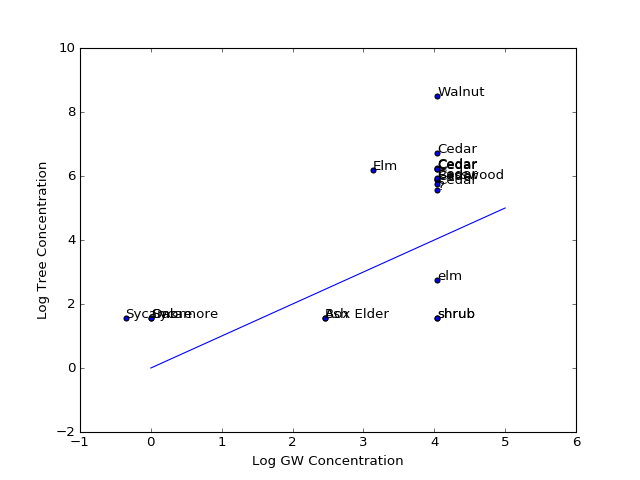

In [46]:
buffer=60

# tree_buffer_const = 10
gw_082013_buffer=gw_082013_ft1.buffer(buffer)
gw_032016_buffer=gw_032016_ft1.buffer(buffer)
gw_042015_buffer=gw_042015_ft1.buffer(buffer)
gw_092014_buffer=gw_092014_ft1.buffer(buffer)
gw_052013_buffer=gw_052013_ft1.buffer(buffer)

gw_082013_ft.geometry = gw_082013_buffer
gw_032016_ft.geometry = gw_032016_buffer
gw_042015_ft.geometry = gw_042015_buffer
gw_092014_ft.geometry = gw_092014_buffer
gw_052013_ft.geometry = gw_052013_buffer

#Execute a spatial join with wells to trees 
data = []
try:
    trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
    data.append(trees_gw_052013)
except:
    pass
try:
    trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
    data.append(trees_gw_082013)
except:
    pass
try:
    trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
    data.append(trees_gw_082014)
except:
    pass
try:
    trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
    data.append(trees_gw_052015)
except:
    pass
try:
    trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
    data.append(trees_gw_112015)
except:
    pass

trees_gw_pce_shallow = pd.DataFrame()
trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=4.7,'Average_PC']=4.7
trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])

trees_gw_pce_deep = pd.DataFrame()
trees_gw_pce_deep = trees_gw_pce_deep.append(data)
trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=4.7,'Average_PC']=4.7
trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])


trees_gw_tce_shallow = pd.DataFrame()
trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=7.7
trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])

trees_gw_tce_deep = pd.DataFrame()
trees_gw_tce_deep = trees_gw_tce_deep.append(data)
trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=7.7
trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])


trees_gw_cfc_shallow = pd.DataFrame()
trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=np.nan
trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

trees_gw_cfc_deep = pd.DataFrame()
trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=0.1
trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])


# ## Shallow CFC Regression Model   
# try:
#     X1s = sm.add_constant(trees_gw_cfc_shallow.gw_log_cfc)
#     model_cfc = sm.OLS(trees_gw_cfc_shallow.tree_log_cfc,X1s, missing='drop')
#     results_cfc_s = model_cfc.fit()

#     statsmodels.graphics.regressionplots.plot_regress_exog(results_cfc_s,1)


# except:
#     pass


#     try:
#         rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')

#     except:
#         pass

# ## Deep CFC Regression Model 
#     try:
#         X1d = sm.add_constant(trees_gw_cfc_deep.tree_log_cfc)
#         model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
#         results_cfc_d = model_cfc.fit()


#     except:
#         pass


#     try:
#         rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')


#     except:
#         pass


# ## Shallow TCE Regression Model
#     try:
#         X2s = sm.add_constant(trees_gw_tce_shallow.tree_log_tce)
#         model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
#         results_tce_s = model_tce.fit()

#     except:
#         pass


#     try:
#         rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')

#     except:
#         pass


# ## Deep TCE Regression Model
#     try:
#         X2d = sm.add_constant(trees_gw_tce_deep.tree_log_tce)
#         model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2s, missing='drop')
#         results_tce_d = model_tce.fit()


#     except:
#         pass


#     try:
#         rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')


#     except:
#         pass



## Shallow PCE Regression Model 
X = trees_gw_pce_shallow[['gw_log_pce','Average_Tr']]
X3s = sm.add_constant(X)
# X3s = sm.add_constant(trees_gw_pce_shallow.tree_log_pce)
model_pce = sm.OLS(trees_gw_pce_shallow.tree_log_pce,X3s, missing='drop')
results_pce_s = model_pce.fit()

# fig, ax = plt.subplots()
# ax.scatter(trees_gw_pce_shallow.gw_log_pce,trees_gw_pce_shallow.tree_log_pce)
# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
# plt.xlabel('Log GW Concentration')
# plt.ylabel('Log Tree Concentration')
# plt.plot([0,results_pce_s.params],[0,5])
    
# plt.show()

# results_pce_s.summary()

# statsmodels.graphics.regressionplots.plot_regress_exog(results_pce_s,1)



        
#     try:
#         rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        

#     except:
#         pass

        
        
# ## Deep PCE Regression Model 
#     try:
#         X3d = sm.add_constant(trees_gw_pce_deep.tree_log_pce)
#         model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
#         results_pce_d = model_pce.fit()

#         stats.iloc[j-1,18]=results_pce_d.rsquared_adj
#         stats.iloc[j-1,19]=results_pce_d.pvalues.loc['const']
#         stats.iloc[j-1,20]=results_pce_d.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,21]=results_pce_d.df_resid+2

#     except:
#         stats.iloc[j-1,18]=np.nan
#         stats.iloc[j-1,19]=np.nan
#         stats.iloc[j-1,20]=np.nan
#         stats.iloc[j-1,21]=np.nan
        
#     try:
#         rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,22]=rho_pce_d.correlation
#         stats.iloc[j-1,23]=rho_pce_d.pvalue
#     except:
#         stats.iloc[j-1,22]=np.nan
#         stats.iloc[j-1,23]=np.nan           
     

#     j+=1
    


In [47]:
results_pce_s.params

const        -5.208083
gw_log_pce    2.212010
Average_Tr    0.304760
dtype: float64

## Looped LR on Shallow and Deep Aquifer

In [ ]:

# # buffer=60
# stats = pd.DataFrame(columns=['R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p', 'rho-TCE','p','R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p','rho-TCE','p'], index = range(60,300,10))

# j=1
# for x in range(60,300,10):
# # tree_buffer_const = 10
#     gw_082013_buffer=gw_082013_ft1.buffer(x)
#     gw_032016_buffer=gw_032016_ft1.buffer(x)
#     gw_042015_buffer=gw_042015_ft1.buffer(x)
#     gw_092014_buffer=gw_092014_ft1.buffer(x)
#     gw_052013_buffer=gw_052013_ft1.buffer(x)

#     gw_082013_ft.geometry = gw_082013_buffer
#     gw_032016_ft.geometry = gw_032016_buffer
#     gw_042015_ft.geometry = gw_042015_buffer
#     gw_092014_ft.geometry = gw_092014_buffer
#     gw_052013_ft.geometry = gw_052013_buffer

#     #Execute a spatial join with wells to trees 
#     trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
#     trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
#     trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
#     trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
#     trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')

#     trees_gw_pce_shallow=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_pce_deep=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])

#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan

#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan

#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
#     trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])

#     trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
#     trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])
    
    
    
#     trees_gw_tce_shallow=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_tce_deep=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])

#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
    
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan

#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
#     trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])
   

#     trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
#     trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])
    
    
       
#     trees_gw_cfc_shallow=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
#     trees_gw_cfc_deep=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])

#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan

#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan

#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
#     trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

#     trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
#     trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])


#     X1s = sm.add_constant(trees_gw_cfc_shallow.tree_log_cfc)
#     model_cfc = sm.OLS(trees_gw_cfc_shallow.gw_log_cfc,X1s, missing='drop')
#     results_cfc_s = model_cfc.fit()
    
#     rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')
    
#     X1d = sm.add_constant(trees_gw_cfc_deep.tree_log_cfc)
#     model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
#     results_cfc_d = model_cfc.fit()
    
#     rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')


# #     X2s = sm.add_constant(trees_gw_tce_shallow.tree_log_tce)
# #     model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
# #     results_tce_s = model_tce.fit()
    
#     rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')
    
    
# #     X2d = sm.add_constant(trees_gw_tce_deep.tree_log_tce)
# #     model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2d, missing='drop')
# #     results_tce_d = model_tce.fit()
    
#     rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')

#     X3s = sm.add_constant(trees_gw_pce_shallow.tree_log_pce)
#     model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
#     results_pce_s = model_pce.fit()
    
#     rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')
    
#     X3d = sm.add_constant(trees_gw_pce_deep.tree_log_pce)
#     model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
#     results_pce_d = model_pce.fit()
    
#     rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')
    
#     stats.iloc[j-1,0]=results_pce_s.rsquared_adj
#     stats.iloc[j-1,1]=results_pce_s.pvalues.loc['const']
#     stats.iloc[j-1,2]=results_pce_s.pvalues.loc['tree_log_pce']
#     stats.iloc[j-1,3]=results_pce_s.df_resid+2
#     stats.iloc[j-1,4]=rho_pce_s.correlation
#     stats.iloc[j-1,5]=rho_pce_s.pvalue
#     stats.iloc[j-1,6]=results_cfc_s.rsquared_adj
#     stats.iloc[j-1,7]=results_cfc_s.pvalues.loc['const']
#     stats.iloc[j-1,8]=results_cfc_s.pvalues.loc['tree_log_cfc']
#     stats.iloc[j-1,9]=results_cfc_s.df_resid+2
#     stats.iloc[j-1,10]=rho_cfc_s.correlation
#     stats.iloc[j-1,11]=rho_cfc_s.pvalue
#     stats.iloc[j-1,12]=rho_tce_s.correlation
#     stats.iloc[j-1,13]=rho_tce_s.pvalue
    
#     stats.iloc[j-1,14]=results_pce_d.rsquared_adj
#     stats.iloc[j-1,15]=results_pce_d.pvalues.loc['const']
#     stats.iloc[j-1,16]=results_pce_d.pvalues.loc['tree_log_pce']
#     stats.iloc[j-1,17]=results_pce_d.df_resid+2
#     stats.iloc[j-1,18]=rho_pce_d.correlation
#     stats.iloc[j-1,19]=rho_pce_d.pvalue
#     stats.iloc[j-1,20]=results_cfc_d.rsquared_adj
#     stats.iloc[j-1,21]=results_cfc_d.pvalues.loc['const']
#     stats.iloc[j-1,22]=results_cfc_d.pvalues.loc['tree_log_cfc']
#     stats.iloc[j-1,23]=results_cfc_d.df_resid+2
#     stats.iloc[j-1,24]=rho_cfc_d.correlation
#     stats.iloc[j-1,25]=rho_cfc_d.pvalue
#     stats.iloc[j-1,26]=rho_tce_d.correlation
#     stats.iloc[j-1,27]=rho_tce_d.pvalue
    

#     j+=1
    
# else:
#     print('done')
    
# stats.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_depth_aboveMQL.xlsx')

## Looped MLR Tree and Diameter

In [ ]:
# buffer=10
# stats = pd.DataFrame(columns=['R2-PCE', 'c','p1', 'p2','n','rho-PCE', 'p','R2-CFC','c', 'p1', 'p2','n','rho-CFC','p', 'R2-TCE', 'c','p1', 'p2','n','rho-TCE', 'p','R2-PCE', 'c','p1', 'p2','n','rho-PCE', 'p','R2-CFC','c', 'p1', 'p2','n','rho-CFC','p','R2-TCE', 'c','p1', 'p2','n','rho-TCE', 'p'], index = range(buffer,300,10))
# data=[]
# j=1
# for x in range(buffer,300,10):
# # tree_buffer_const = 10
#     gw_082013_buffer=gw_082013_ft1.buffer(x)
#     gw_032016_buffer=gw_032016_ft1.buffer(x)
#     gw_042015_buffer=gw_042015_ft1.buffer(x)
#     gw_092014_buffer=gw_092014_ft1.buffer(x)
#     gw_052013_buffer=gw_052013_ft1.buffer(x)

#     gw_082013_ft.geometry = gw_082013_buffer
#     gw_032016_ft.geometry = gw_032016_buffer
#     gw_042015_ft.geometry = gw_042015_buffer
#     gw_092014_ft.geometry = gw_092014_buffer
#     gw_052013_ft.geometry = gw_052013_buffer

#     #Execute a spatial join with wells to trees 
#     data = []
#     try:
#         trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
#         data.append(trees_gw_052013)
#     except:
#         pass
#     try:
#         trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
#         data.append(trees_gw_082013)
#     except:
#         pass
#     try:
#         trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
#         data.append(trees_gw_082014)
#     except:
#         pass
#     try:
#         trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
#         data.append(trees_gw_052015)
#     except:
#         pass
#     try:
#         trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
#         data.append(trees_gw_112015)
#     except:
#         pass

#     trees_gw_pce_shallow = pd.DataFrame()
#     trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
#     trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
#     trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])
    
#     trees_gw_pce_deep = pd.DataFrame()
#     trees_gw_pce_deep = trees_gw_pce_deep.append(data)
#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
#     trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
#     trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=4.7,'Average_PC']=4.7
#     trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
#     trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])

    
#     trees_gw_tce_shallow = pd.DataFrame()
#     trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
#     trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])
    
#     trees_gw_tce_deep = pd.DataFrame()
#     trees_gw_tce_deep = trees_gw_tce_deep.append(data)
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
#     trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=7.7
#     trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
#     trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])
    
    
#     trees_gw_cfc_shallow = pd.DataFrame()
#     trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
#     trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
#     trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

#     trees_gw_cfc_deep = pd.DataFrame()
#     trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
#     trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
#     trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=0.1
#     trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
#     trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])
   
    
# ## Shallow CFC Regression Model   
#     try:
#         X_cfc_s = trees_gw_cfc_shallow[['tree_log_cfc','Average_Tr']]
#         X1s = sm.add_constant(X_cfc_s)
#         model_cfc = sm.OLS(trees_gw_cfc_shallow.gw_log_cfc,X1s, missing='drop')
#         results_cfc_s = model_cfc.fit()

#         stats.iloc[j-1,7]=results_cfc_s.rsquared_adj
#         stats.iloc[j-1,8]=results_cfc_s.pvalues.loc['const']
#         stats.iloc[j-1,9]=results_cfc_s.pvalues.loc['tree_log_cfc']
#         stats.iloc[j-1,10]=results_cfc_s.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,11]=results_cfc_s.df_resid+2

#     except:
#         stats.iloc[j-1,7]=np.nan
#         stats.iloc[j-1,8]=np.nan
#         stats.iloc[j-1,9]=np.nan
#         stats.iloc[j-1,10]=np.nan
#         stats.iloc[j-1,11]=np.nan
        
    
#     try:
#         rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')
        
#         stats.iloc[j-1,12]=rho_cfc_s.correlation
#         stats.iloc[j-1,13]=rho_cfc_s.pvalue
#     except:
#         stats.iloc[j-1,12]=np.nan
#         stats.iloc[j-1,13]=np.nan        
# ## Deep CFC Regression Model 
#     try:
#         X_cfc_d = trees_gw_cfc_deep[['tree_log_cfc','Average_Tr']]
#         X1d = sm.add_constant(X_cfc_d)
#         model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
#         results_cfc_d = model_cfc.fit()

#         stats.iloc[j-1,28]=results_cfc_d.rsquared_adj
#         stats.iloc[j-1,29]=results_cfc_d.pvalues.loc['const']
#         stats.iloc[j-1,30]=results_cfc_d.pvalues.loc['tree_log_cfc']
#         stats.iloc[j-1,31]=results_cfc_d.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,32]=results_cfc_d.df_resid+2

#     except:
#         stats.iloc[j-1,28]=np.nan
#         stats.iloc[j-1,29]=np.nan
#         stats.iloc[j-1,30]=np.nan
#         stats.iloc[j-1,31]=np.nan
#         stats.iloc[j-1,32]=np.nan
    
#     try:
#         rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')
        
#         stats.iloc[j-1,33]=rho_cfc_d.correlation
#         stats.iloc[j-1,34]=rho_cfc_d.pvalue
#     except:
#         stats.iloc[j-1,33]=np.nan
#         stats.iloc[j-1,34]=np.nan 
        
        
# ## Shallow TCE Regression Model
#     try:
#         X_tce_s = trees_gw_tce_shallow[['tree_log_tce','Average_Tr']]
#         X2s = sm.add_constant(X_tce_s)
#         model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
#         results_tce_s = model_tce.fit()

#         stats.iloc[j-1,14]=results_tce_s.rsquared_adj
#         stats.iloc[j-1,15]=results_tce_s.pvalues.loc['const']
#         stats.iloc[j-1,16]=results_tce_s.pvalues.loc['tree_log_tce']
#         stats.iloc[j-1,17]=results_tce_s.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,18]=results_tce_s.df_resid+3

#     except ValueError:
#         stats.iloc[j-1,14]=np.nan
#         stats.iloc[j-1,15]=np.nan
#         stats.iloc[j-1,16]=np.nan
#         stats.iloc[j-1,17]=np.nan
#         stats.iloc[j-1,18]=np.nan
        
#     try:
#         rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')
        
#         stats.iloc[j-1,19]=rho_tce_s.correlation
#         stats.iloc[j-1,20]=rho_tce_s.pvalue
#     except:
#         stats.iloc[j-1,19]=np.nan
#         stats.iloc[j-1,20]=np.nan
        
# ## Deep TCE Regression Model
#     try:
#         X_tce_d = trees_gw_tce_deep[['tree_log_tce','Average_Tr']]
#         X2d = sm.add_constant(X_tce_d)
#         model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2s, missing='drop')
#         results_tce_d = model_tce.fit()

#         stats.iloc[j-1,35]=results_tce_d.rsquared_adj
#         stats.iloc[j-1,36]=results_tce_d.pvalues.loc['const']
#         stats.iloc[j-1,37]=results_tce_d.pvalues.loc['tree_log_tce']
#         stats.iloc[j-1,38]=results_tce_d.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,39]=results_tce_d.df_resid+3

#     except:
#         stats.iloc[j-1,35]=np.nan
#         stats.iloc[j-1,36]=np.nan
#         stats.iloc[j-1,37]=np.nan
#         stats.iloc[j-1,38]=np.nan
#         stats.iloc[j-1,39]=np.nan
        
#     try:
#         rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')
        
#         stats.iloc[j-1,40]=rho_cfc_d.correlation
#         stats.iloc[j-1,41]=rho_cfc_d.pvalue
#     except:
#         stats.iloc[j-1,40]=np.nan
#         stats.iloc[j-1,41]=np.nan
        
        
# ## Shallow PCE Regression Model 
#     try:
#         X_pce_s = trees_gw_pce_shallow[['tree_log_pce','Average_Tr']]
#         X3s = sm.add_constant(X_pce_s)
#         model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
#         results_pce_s = model_pce.fit()

#         stats.iloc[j-1,0]=results_pce_s.rsquared_adj
#         stats.iloc[j-1,1]=results_pce_s.pvalues.loc['const']
#         stats.iloc[j-1,2]=results_pce_s.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,3]=results_pce_s.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,4]=results_pce_s.df_resid+2

#     except:
#         stats.iloc[j-1,0]=np.nan
#         stats.iloc[j-1,1]=np.nan
#         stats.iloc[j-1,2]=np.nan
#         stats.iloc[j-1,3]=np.nan
#         stats.iloc[j-1,4]=np.nan
        
#     try:
#         rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,5]=rho_pce_s.correlation
#         stats.iloc[j-1,6]=rho_pce_s.pvalue
#     except ValueError:
#         stats.iloc[j-1,5]=np.nan
#         stats.iloc[j-1,6]=np.nan  
        
        
# ## Deep PCE Regression Model 
#     try:
#         X_pce_d = trees_gw_pce_deep[['tree_log_pce','Average_Tr']]
#         X3d = sm.add_constant(X_pce_d)
#         model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
#         results_pce_d = model_pce.fit()

#         stats.iloc[j-1,21]=results_pce_d.rsquared_adj
#         stats.iloc[j-1,22]=results_pce_d.pvalues.loc['const']
#         stats.iloc[j-1,23]=results_pce_d.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,24]=results_pce_d.pvalues.loc['Average_Tr']
#         stats.iloc[j-1,25]=results_pce_d.df_resid+2

#     except:
#         stats.iloc[j-1,21]=np.nan
#         stats.iloc[j-1,22]=np.nan
#         stats.iloc[j-1,23]=np.nan
#         stats.iloc[j-1,24]=np.nan
#         stats.iloc[j-1,25]=np.nan
        
#     try:
#         rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,26]=rho_pce_d.correlation
#         stats.iloc[j-1,27]=rho_pce_d.pvalue
#     except:
#         stats.iloc[j-1,26]=np.nan
#         stats.iloc[j-1,27]=np.nan           
     

#     j+=1
    
# else:
#     print('done')
    
# stats.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_MLR_aboveMDL_Depth.xlsx')